# Annual Race Review

In [140]:
import pandas as pd
import numpy as np
import datetime
import os


# Viz libs
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import plotly.express as px

# display options
# pd.options.display.float_format = "{:.2f}".format


import set_config


In [2]:
dir_local = set_config.ConfigSectionMap("SectionOne")['local']
dir_sanofi_share = set_config.ConfigSectionMap("SectionOne")['sanofi']
dir_race = set_config.ConfigSectionMap("SectionOne")['race']

print ("dir_sanofi_share is %s" % (dir_sanofi_share))
print ("dir_local is %s" % (dir_local))

dir_sanofi_share is C:/Users/mark_/Sanofi/Sanofi x McLaren sharing - General/Frankfurt sprint/SFD/
dir_local is C:/Users/mark_/Documents/McLaren2021/Sanofi/


In [4]:
def read_excel_file(passed_dir, filename):
    path = os.path.join(passed_dir, filename)
    temp_df = pd.read_excel(path)
    return temp_df

folder = 'Race Dashboard data'

file = ('df_weekly_with_calcs.xlsx')
df = read_excel_file(dir_race, file)



Line
FRA - Devices Pens, AL5 Packaging 1    AxesSubplot(0.125,0.125;0.775x0.755)
FRA - Devices Pens, AL6                AxesSubplot(0.125,0.125;0.775x0.755)
FRA - FF NLP, M18 Filling              AxesSubplot(0.125,0.125;0.775x0.755)
FRA - FF NLP, M21 Filling              AxesSubplot(0.125,0.125;0.775x0.755)
FRA - FF NLP, M22 Filling              AxesSubplot(0.125,0.125;0.775x0.755)
LLB - Bosch-2 Packaging (SOLD)         AxesSubplot(0.125,0.125;0.775x0.755)
LLB - IMA-2 Packaging (SOLD)           AxesSubplot(0.125,0.125;0.775x0.755)
LSX - SUPPO Packaging Line             AxesSubplot(0.125,0.125;0.775x0.755)
LSX - TR200 Packaging Line             AxesSubplot(0.125,0.125;0.775x0.755)
LTR - C5 Packaging Line                AxesSubplot(0.125,0.125;0.775x0.755)
MAF - C2 Packaging Line                AxesSubplot(0.125,0.125;0.775x0.755)
MAF - C9 Packaging Line                AxesSubplot(0.125,0.125;0.775x0.755)
SCO - GAMMA1                           AxesSubplot(0.125,0.125;0.775x0.755)
SCO - I

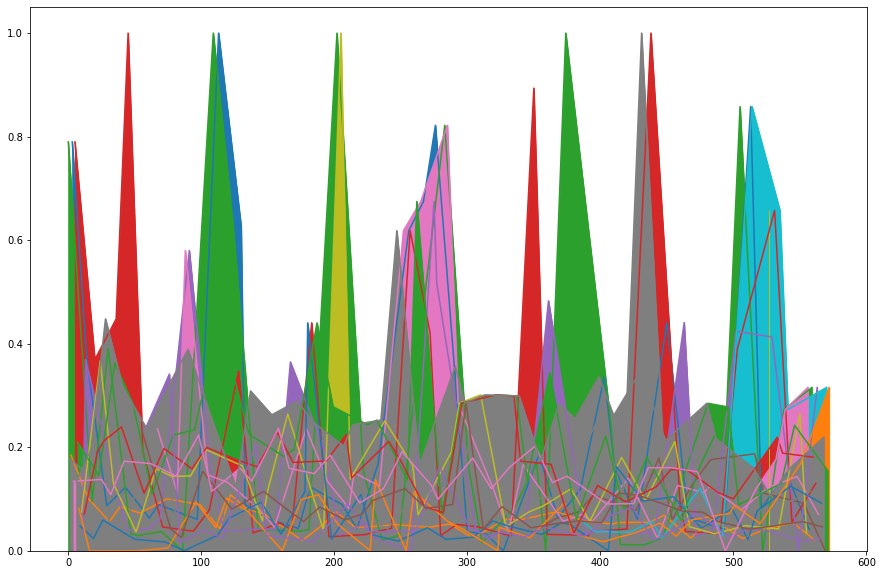

In [19]:
df.groupby('Line').Changeover.plot.area(figsize=(15,10))

<AxesSubplot:xlabel='Line', ylabel='Changeover'>

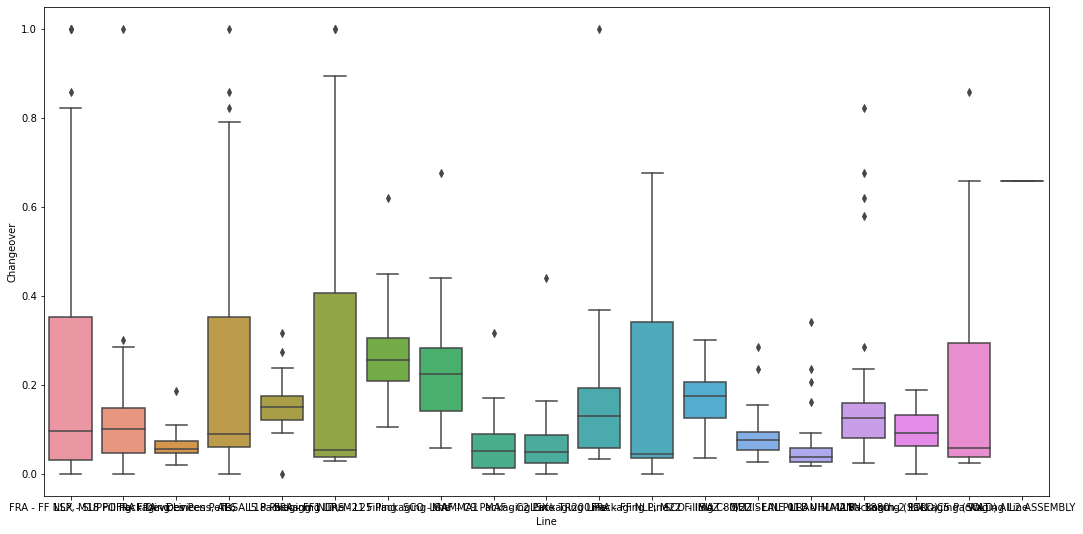

In [29]:
plt.figure(figsize=(18,9))

sns.boxplot(data=df, x='Line', y='Changeover')

<Figure size 1500x1000 with 0 Axes>

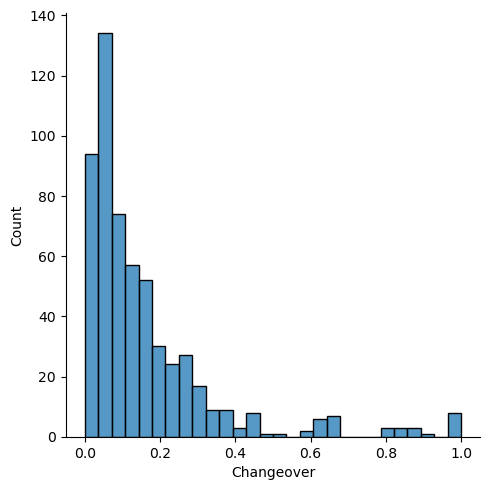

In [68]:
plt.figure(figsize=(15,10))
sns.displot(df, x='Changeover')

Text(0, 0.5, 'Changeover')

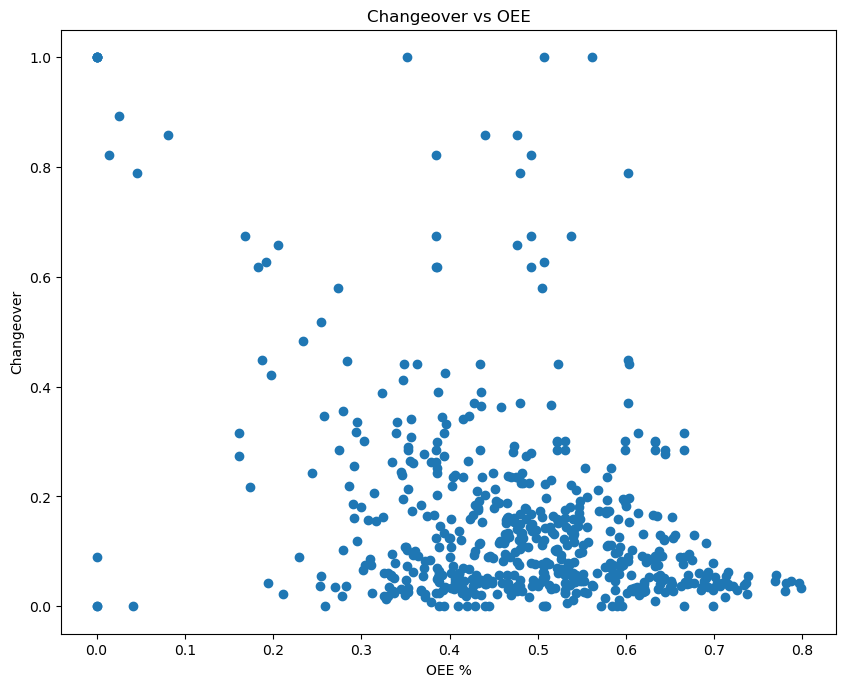

In [62]:
x = df['OEE %']
y = df['Changeover']

plt.scatter(x, y)
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.title('Changeover vs OEE')
plt.xlabel('OEE %')
plt.ylabel('Changeover')

Text(0, 0.5, 'Changeover')

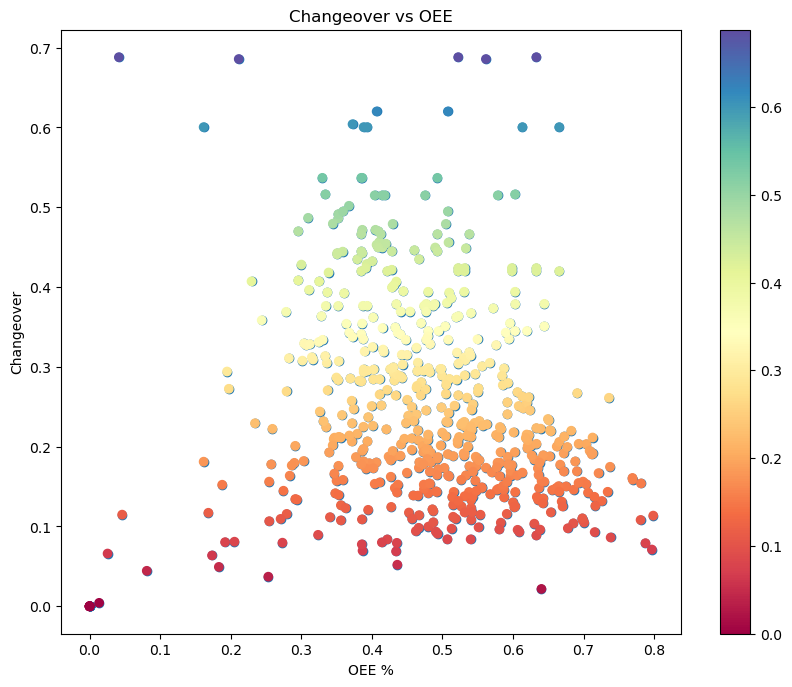

In [135]:
x = df['OEE %']
y = df['Unplanned_tech_loss']

plt.scatter(x, y)
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.title('Changeover vs OEE')
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('OEE %')
plt.ylabel('Changeover')

<AxesSubplot:title={'center':'Changeover SFI'}, xlabel='Date'>

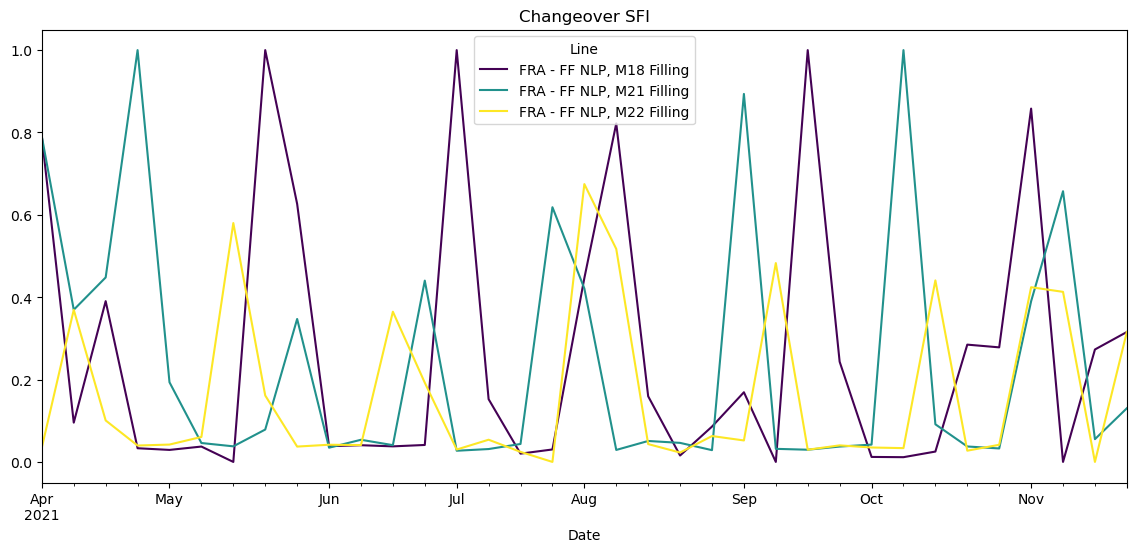

In [137]:


df.pivot_table(index='Date', columns='Line', values='Changeover').filter(regex='M18|M21|M22').plot(figsize=(14,6), title='Changeover SFI', cmap='viridis')

# sns.lineplot(data=df, x='Date', y='Changeover')

In [128]:
packaging = pivot_cols[~pivot_cols.str.contains('M18|M21|M22')]
packaging


Index(['FRA - Devices Pens, AL5 Packaging 1', 'FRA - Devices Pens, AL6',
       'LLB - Bosch-2 Packaging (SOLD)', 'LLB - IMA-2 Packaging (SOLD)',
       'LSX - SUPPO Packaging Line', 'LSX - TR200 Packaging Line',
       'LTR - C5 Packaging Line', 'MAF - C2 Packaging Line',
       'MAF - C9 Packaging Line', 'SCO - GAMMA1', 'SCO - IMA C80/2',
       'SUZ - LINE 01 - UHLMANN 1880', 'SUZ - MEDISEAL PURAN',
       'TRS - L18 Packaging Line', 'TRS - L25 Packaging Line'],
      dtype='object', name='Line')

<AxesSubplot:title={'center':'Changeover rolling mean'}, xlabel='Date'>

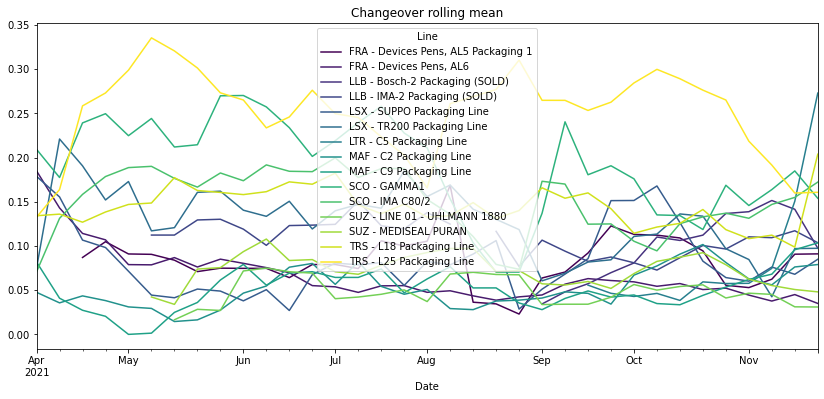

In [192]:

df.pivot_table(index='Date', columns='Line', values='Changeover_rolling_mean')[packaging].plot(figsize=(14,6), title='Changeover rolling mean', cmap='viridis')

In [218]:
plt.figure(figsize=(15,10))
sns.lineplot(data=df, x=df['Date'], y=df['Changeover_rolling_mean'], hue='Line')

KeyError: "None of [Index(['FRA - Devices Pens, AL5 Packaging 1', 'FRA - Devices Pens, AL6',\n       'LLB - Bosch-2 Packaging (SOLD)', 'LLB - IMA-2 Packaging (SOLD)',\n       'LSX - SUPPO Packaging Line', 'LSX - TR200 Packaging Line',\n       'LTR - C5 Packaging Line', 'MAF - C2 Packaging Line',\n       'MAF - C9 Packaging Line', 'SCO - GAMMA1', 'SCO - IMA C80/2',\n       'SUZ - LINE 01 - UHLMANN 1880', 'SUZ - MEDISEAL PURAN',\n       'TRS - L18 Packaging Line', 'TRS - L25 Packaging Line'],\n      dtype='object', name='Line')] are in the [columns]"

<Figure size 1080x720 with 0 Axes>

In [164]:
fig = px.scatter(df, x='Date', y='Changeover', trendline='rolling', trendline_options=dict(window=4), trendline_scope='overall')
fig.show()



In [208]:
import plotly.graph_objects as go # or plotly.express as px
# fig = px.lineplot(data=df, x=df['Date'], y=df['Changeover_rolling_mean'], hue='Line')
fig = px.line(df, x='Date', y='Changeover_rolling_mean', color='Line')
# fig = go.Figure() # or any Plotly Express function e.g. px.bar(...)


import dash
from dash import dcc
import dash_html_components as html

app = dash.Dash()
app.layout = html.Div([
    dcc.Graph(figure=fig)
])

app.run_server(debug=True, use_reloader=False)  # Turn off reloader if inside Jupyter

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


In [190]:
df.sort_values(['Line','Date'], inplace=True)
df[df.Line == 'FRA - FF NLP, M18 Filling'][['Changeover','Changeover_rolling_mean']]

,Changeover,Changeover_rolling_mean
0,0.789781,0.789781
18,0.095404,0.442593
30,0.390417,0.425201
47,0.033241,0.327211
52,0.029190,0.137063
70,0.037331,0.122545
86,0.000000,0.024941
109,1.000000,0.266630
124,0.626590,0.415980
143,0.038185,0.416194


In [216]:
fig = px.line(df, x='Date', y='Changeover_rolling_mean', color='Line')
fig.show()